In [1]:
%matplotlib inline
train = pd.read_csv('share/train.csv')
test = pd.read_csv('share/test.csv')
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


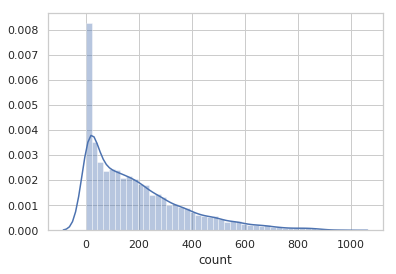

In [24]:
sns.distplot(train['count'])
plt.show()

# season별 대여량

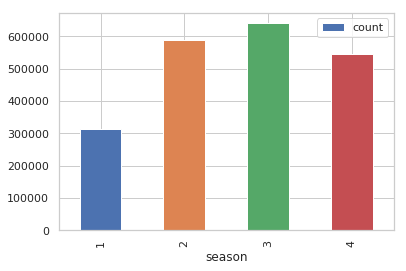

In [4]:
season_counts = train[['season','count']].groupby('season').sum().reset_index()
season_counts.plot.bar(x='season', y='count', )
plt.show()

# temp별 대여량

In [127]:
temp_counts = train[['temp','count']]
print(np.unique(train['temp']), '값갯수 :', len(np.unique(train['temp'])))

[ 0.82  1.64  2.46  3.28  4.1   4.92  5.74  6.56  7.38  8.2   9.02  9.84
 10.66 11.48 12.3  13.12 13.94 14.76 15.58 16.4  17.22 18.04 18.86 19.68
 20.5  21.32 22.14 22.96 23.78 24.6  25.42 26.24 27.06 27.88 28.7  29.52
 30.34 31.16 31.98 32.8  33.62 34.44 35.26 36.08 36.9  37.72 38.54 39.36
 41.  ] 값갯수 : 49


### 1) temp 구간 나누기

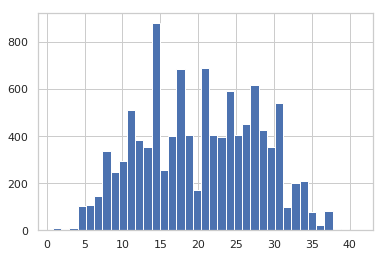

In [128]:
n, bins, pathes = plt.hist(train['temp'], bins='auto')

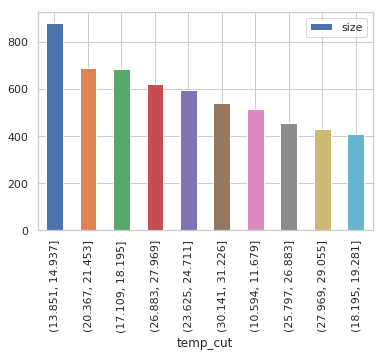

In [151]:
temp_counts['temp_cut']=pd.cut(train['temp'], bins=bins)
temp_counts.groupby(temp_counts['temp_cut']).size().reset_index().rename({0 : 'size'}, axis='columns').sort_values(by='size', ascending=False).head(10).plot.bar(x='temp_cut',y='size')
plt.show()

### 2) temp 구간 따른 count

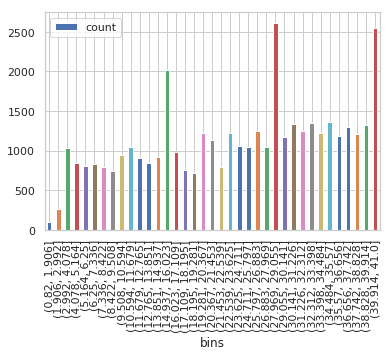

In [130]:
temp_counts['bins'] = pd.cut(temp_counts['count'], bins)
temp_counts1 = temp_counts[['count','bins']].groupby('bins').sum().reset_index()
temp_counts1.plot.bar(x='bins', y='count')
plt.show()

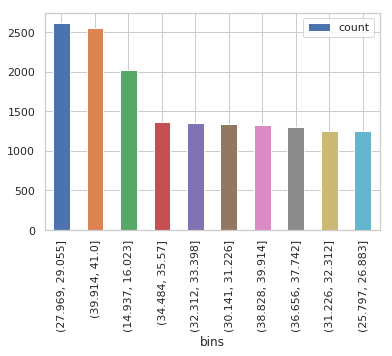

In [149]:
temp_counts1.sort_values(by='count', ascending=False).head(10).plot.bar(x='bins', y='count')
plt.show()

### 보충사항: temp 상위 10개에 따른 count